In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.6 MB/s eta 0:00:00


Importing Important Libraries

In [28]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_score, learning_curve
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from sklearn.metrics import log_loss, matthews_corrcoef
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import joblib
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid, cross_val_score
from tqdm import tqdm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os






Pre-Process the Data and save the preprocessed data into drive

In [ ]:
# Directory paths for real and synthetic images
real_dir = '/content/drive/MyDrive/Deep Fake Data/Project data/Real'
synthetic_dir = '/content/drive/MyDrive/Deep Fake Data/Project data/Synthetic'

# Output directory paths for preprocessed images
output_real_dir = '/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Real'
output_synthetic_dir = '/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Synthetic'

# Function to preprocess and enhance an image
def preprocess_and_enhance(image_path, target_size=(178, 218)):
    image = cv2.imread(image_path)

    # Resize
    image = cv2.resize(image, target_size)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)

    return enhanced_image

# Preprocess and save images in a directory
def preprocess_and_save_images(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg'):
            input_image_path = os.path.join(input_dir, filename)
            preprocessed_image = preprocess_and_enhance(input_image_path)
            if preprocessed_image is not None:
                output_image_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_image_path, preprocessed_image)

# Preprocess and save real images
preprocess_and_save_images(real_dir, output_real_dir)

# Preprocess and save synthetic images
preprocess_and_save_images(synthetic_dir, output_synthetic_dir)


1. Load the preprocessed data
2. Applying Normalization
3. Saving the output in drive

In [ ]:
# Function to load and preprocess data
def load_and_preprocess_data(data_dir, target_size=(128, 128)):
    images = []
    labels = []

    for label in ['Real', 'Synthetic']:
        label_dir = os.path.join(data_dir, label)
        image_names = os.listdir(label_dir)

        for image_name in image_names:
            image_path = os.path.join(label_dir, image_name)

            # Load and preprocess image
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img)
            preprocessed_img = preprocess_input(img_array)

            images.append(preprocessed_img)
            labels.append(1 if label == 'Real' else 0)

    return np.array(images), np.array(labels)

# Load and preprocess data
data_dir = '/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed'
images, labels = load_and_preprocess_data(data_dir)

# Normalize the images using VGG16 preprocess_input
normalized_images = preprocess_input(images)

# Save the normalized images and labels to Drive
np.save('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/NormalizedImages.npy', normalized_images)
np.save('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Labels.npy', labels)


1. Load the normalize data from drive
2. Applying Feature Extraction technique using VGG16
3. Saving it into drive

In [ ]:
import numpy as np
# Load the normalized images and labels from Drive
loaded_normalized_images = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/NormalizedImages.npy')
loaded_labels = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Labels.npy')

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs=base_model.input, outputs=x)

# Extract features using VGG16
features = feature_extractor.predict(loaded_normalized_images, batch_size=32, verbose=1)

# Save the features and labels to Drive
np.save('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Features.npy', features)
np.save('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Labels.npy', loaded_labels)


634/634 [==============================] - 1927s 3s/step


1. Load Extracted features from drive
2. Splitting the data into Train, validation and test
3. Applying CNN on validation to select best parameters

In [4]:
loaded_features = np.load('/content/drive/MyDrive/Colab Notebooks/Free1/DeepFakeData/Preprocessed/Features.npy')
loaded_labels = np.load('/content/drive/MyDrive/Colab Notebooks/Free1/DeepFakeData/Preprocessed/Labels.npy')

Epoch 1/10
444/444 [==============================] - 4s 5ms/step - loss: 0.1769 - accuracy: 0.9643 - val_loss: 0.0242 - val_accuracy: 0.9911
Epoch 2/10
444/444 [==============================] - 3s 6ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0185 - val_accuracy: 0.9947
Epoch 3/10
444/444 [==============================] - 2s 5ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0181 - val_accuracy: 0.9944
Epoch 4/10
444/444 [==============================] - 3s 6ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0123 - val_accuracy: 0.9974
Epoch 5/10
444/444 [==============================] - 2s 4ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0148 - val_accuracy: 0.9967
Epoch 6/10
444/444 [==============================] - 2s 5ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0284 - val_accuracy: 0.9911
Epoch 7/10
444/444 [==============================] - 2s 4ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0210 - val_accuracy: 0.9931
Epoch 

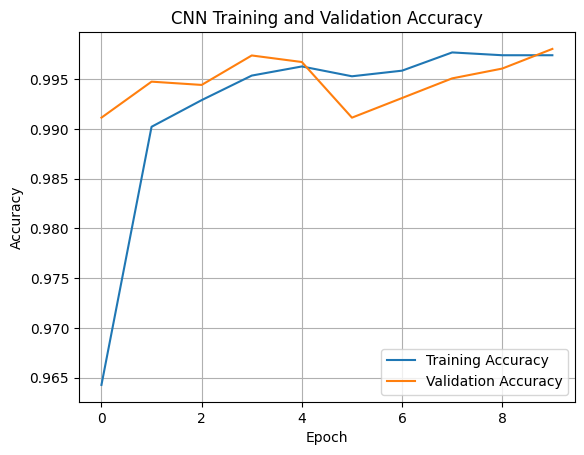

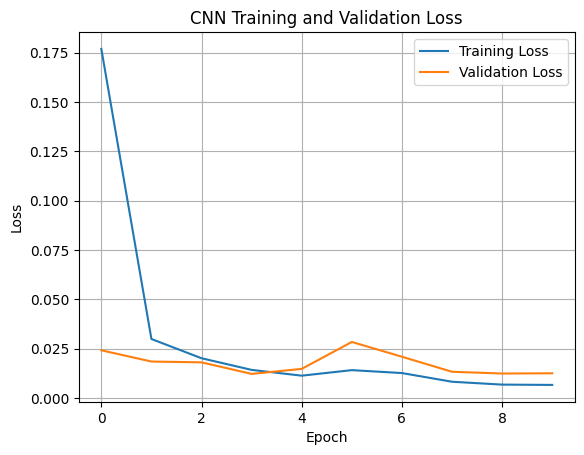

In [5]:
# Load the extracted features and labels from Drive
# loaded_features = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Features.npy')
# loaded_labels = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Labels.npy')

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(loaded_features, loaded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Train a Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Flatten(input_shape=(loaded_features.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Plot training and validation accuracy curves for CNN
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss curves for CNN
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


96/96 [==============================] - 1s 2ms/step


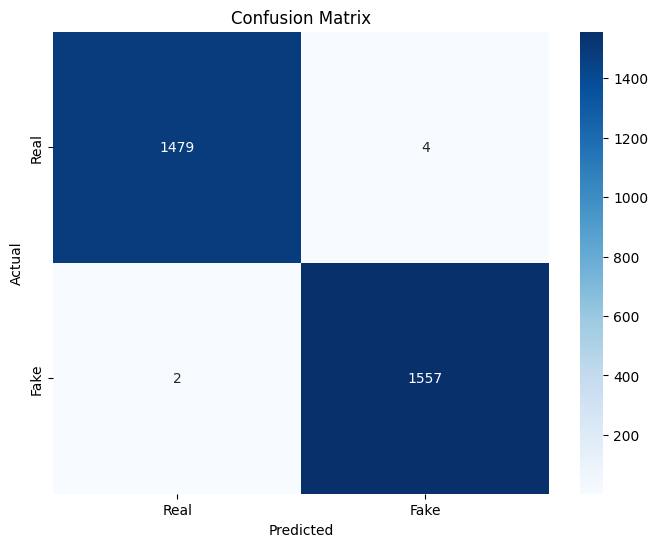

In [6]:
# After training the CNN model, predict the labels for the validation set
cnn_predictions = cnn_model.predict(X_val)
cnn_predictions_binary = (cnn_predictions > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, cnn_predictions_binary)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

CNN Hyperparameter tuning

Best performing parameters batch_size=64, epochs=20 and dropout = 0.7

Epoch 1/20
222/222 [==============================] - 4s 14ms/step - loss: 0.4194 - accuracy: 0.9398 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 2/20
222/222 [==============================] - 3s 14ms/step - loss: 0.0606 - accuracy: 0.9796 - val_loss: 0.0311 - val_accuracy: 0.9882
Epoch 3/20
222/222 [==============================] - 2s 8ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0184 - val_accuracy: 0.9928
Epoch 4/20
222/222 [==============================] - 2s 9ms/step - loss: 0.0338 - accuracy: 0.9875 - val_loss: 0.0194 - val_accuracy: 0.9938
Epoch 5/20
222/222 [==============================] - 2s 8ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0172 - val_accuracy: 0.9938
Epoch 6/20
222/222 [==============================] - 3s 12ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0162 - val_accuracy: 0.9941
Epoch 7/20
222/222 [==============================] - 2s 9ms/step - loss: 0.0186 - accuracy: 0.9933 - val_loss: 0.0175 - val_accuracy: 0.9947
Epo

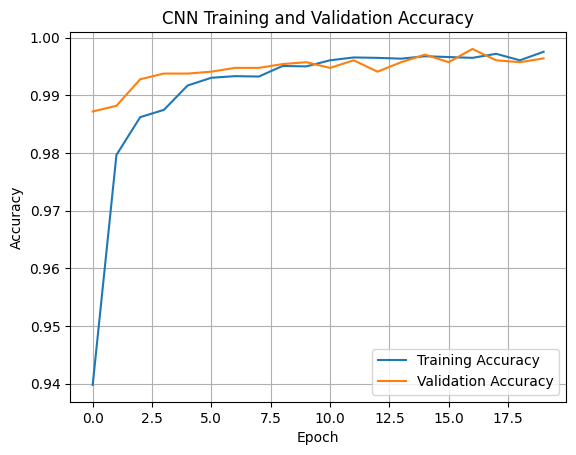

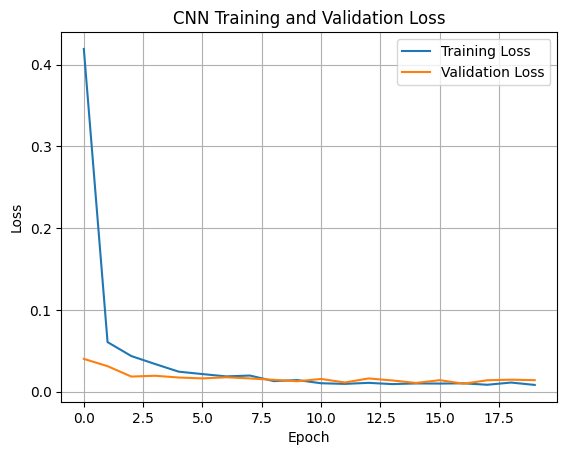

96/96 [==============================] - 0s 2ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1483
           1       0.99      1.00      1.00      1559

    accuracy                           1.00      3042
   macro avg       1.00      1.00      1.00      3042
weighted avg       1.00      1.00      1.00      3042

CNN Accuracy: 0.9963839579224194
CNN Precision: 0.9929936305732484
CNN Recall: 1.0
CNN F1-score: 0.9964844998402045
CNN Log Loss: 0.013637889917901033
CNN Matthews Correlation Coefficient (MCC): 0.9927880954312903


In [8]:
# Train a Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Flatten(input_shape=(loaded_features.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_val, y_val))

# Plot training and validation accuracy curves for CNN
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss curves for CNN
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()
# Evaluate CNN model on validation set
cnn_predictions = cnn_model.predict(X_val)
cnn_predictions_binary = (cnn_predictions > 0.5).astype(int)

# Calculate classification metrics
cnn_accuracy = accuracy_score(y_val, cnn_predictions_binary)
cnn_precision = precision_score(y_val, cnn_predictions_binary)
cnn_recall = recall_score(y_val, cnn_predictions_binary)
cnn_f1 = f1_score(y_val, cnn_predictions_binary)
cnn_log_loss = log_loss(y_val, cnn_predictions)
cnn_mcc = matthews_corrcoef(y_val, cnn_predictions_binary)

# Display classification report
cnn_classification_report = classification_report(y_val, cnn_predictions_binary)
print("CNN Classification Report:\n", cnn_classification_report)

# Display additional metrics
print("CNN Accuracy:", cnn_accuracy)
print("CNN Precision:", cnn_precision)
print("CNN Recall:", cnn_recall)
print("CNN F1-score:", cnn_f1)
print("CNN Log Loss:", cnn_log_loss)
print("CNN Matthews Correlation Coefficient (MCC):", cnn_mcc)


96/96 [==============================] - 0s 2ms/step


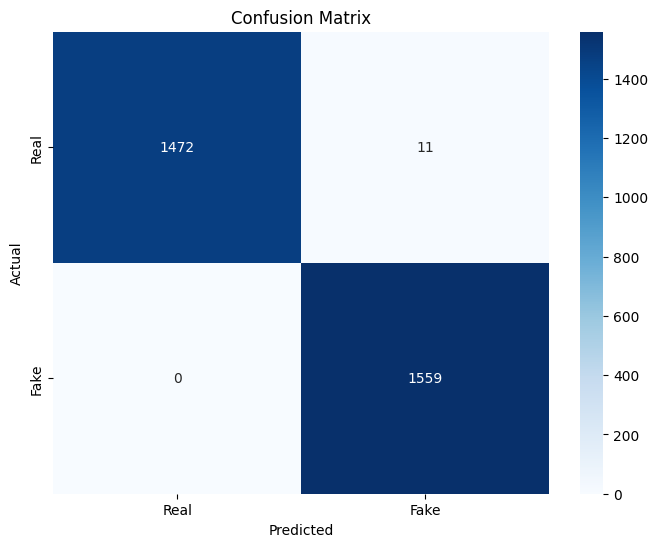

In [9]:
# After training the CNN model, predict the labels for the validation set
cnn_predictions = cnn_model.predict(X_val)
cnn_predictions_binary = (cnn_predictions > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, cnn_predictions_binary)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

CNN Model Evaluation on best performing parameters

In [10]:
# Test CNN on the testing set
cnn_test_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
cnn_test_accuracy = cnn_test_scores[1]

print("CNN Test Accuracy:", cnn_test_accuracy)
# Evaluate CNN model on test set
cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_predictions_binary = (cnn_test_predictions > 0.5).astype(int)

# Calculate classification metrics for test set
cnn_test_accuracy = accuracy_score(y_test, cnn_test_predictions_binary)
cnn_test_precision = precision_score(y_test, cnn_test_predictions_binary)
cnn_test_recall = recall_score(y_test, cnn_test_predictions_binary)
cnn_test_f1 = f1_score(y_test, cnn_test_predictions_binary)
cnn_test_log_loss = log_loss(y_test, cnn_test_predictions)
cnn_test_mcc = matthews_corrcoef(y_test, cnn_test_predictions_binary)

# Display classification report for test set
cnn_test_classification_report = classification_report(y_test, cnn_test_predictions_binary)
print("CNN Test Set Classification Report:\n", cnn_test_classification_report)

# Display additional metrics for test set
print("CNN Test Set Accuracy:", cnn_test_accuracy)
print("CNN Test Set Precision:", cnn_test_precision)
print("CNN Test Set Recall:", cnn_test_recall)
print("CNN Test Set F1-score:", cnn_test_f1)
print("CNN Test Set Log Loss:", cnn_test_log_loss)
print("CNN Test Set Matthews Correlation Coefficient (MCC):", cnn_test_mcc)


CNN Test Accuracy: 0.9953977465629578
96/96 [==============================] - 0s 2ms/step
CNN Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1513
           1       0.99      1.00      1.00      1529

    accuracy                           1.00      3042
   macro avg       1.00      1.00      1.00      3042
weighted avg       1.00      1.00      1.00      3042

CNN Test Set Accuracy: 0.9953977646285339
CNN Test Set Precision: 0.9941291585127201
CNN Test Set Recall: 0.9967298888162197
CNN Test Set F1-score: 0.9954278249510123
CNN Test Set Log Loss: 0.017176433161204263
CNN Test Set Matthews Correlation Coefficient (MCC): 0.9907985738103176


96/96 [==============================] - 0s 2ms/step


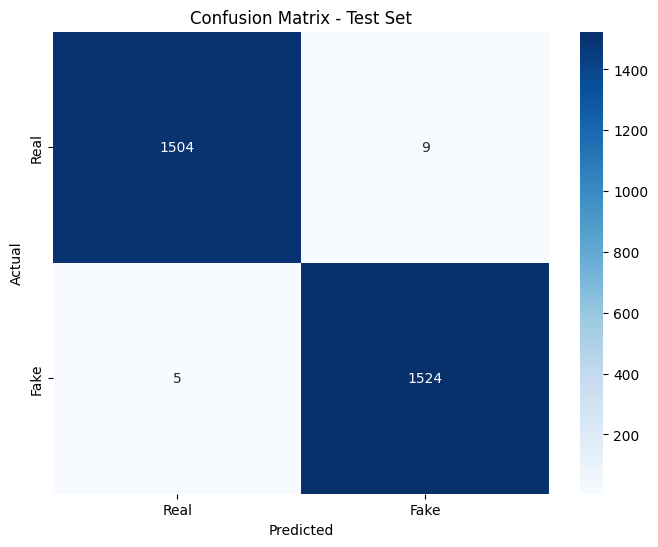

In [11]:
# After evaluating the CNN model on the test set and calculating the classification metrics
cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_predictions_binary = (cnn_test_predictions > 0.5).astype(int)

# Calculate the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, cnn_test_predictions_binary)

# Plot the confusion matrix using a heatmap for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()



Test accuracy of 0.995

Implementation of SVM

SVM Cross-Validation Scores (Validation Set): [0.99014778 0.97865353 0.99342105 0.99013158 0.98684211]
Train Size: 1135
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.989 (+/- 0.002)
Train Size: 2271
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.992 (+/- 0.001)
Train Size: 3406
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.993 (+/- 0.002)
Train Size: 4542
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.994 (+/- 0.001)
Train Size: 5678
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.994 (+/- 0.002)
Train Size: 6813
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.994 (+/- 0.001)
Train Size: 7949
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.995 (+/- 0.001)
Train Size: 9084
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.995 (+/- 0.001)
Train Size: 10220
Train Score Mean: 1.000 (+/- 0.000)
Validation Score Mean: 0.995 (+/- 0.002)
Train Size: 11356
Train Score Mean: 1.000 (+/- 0.0

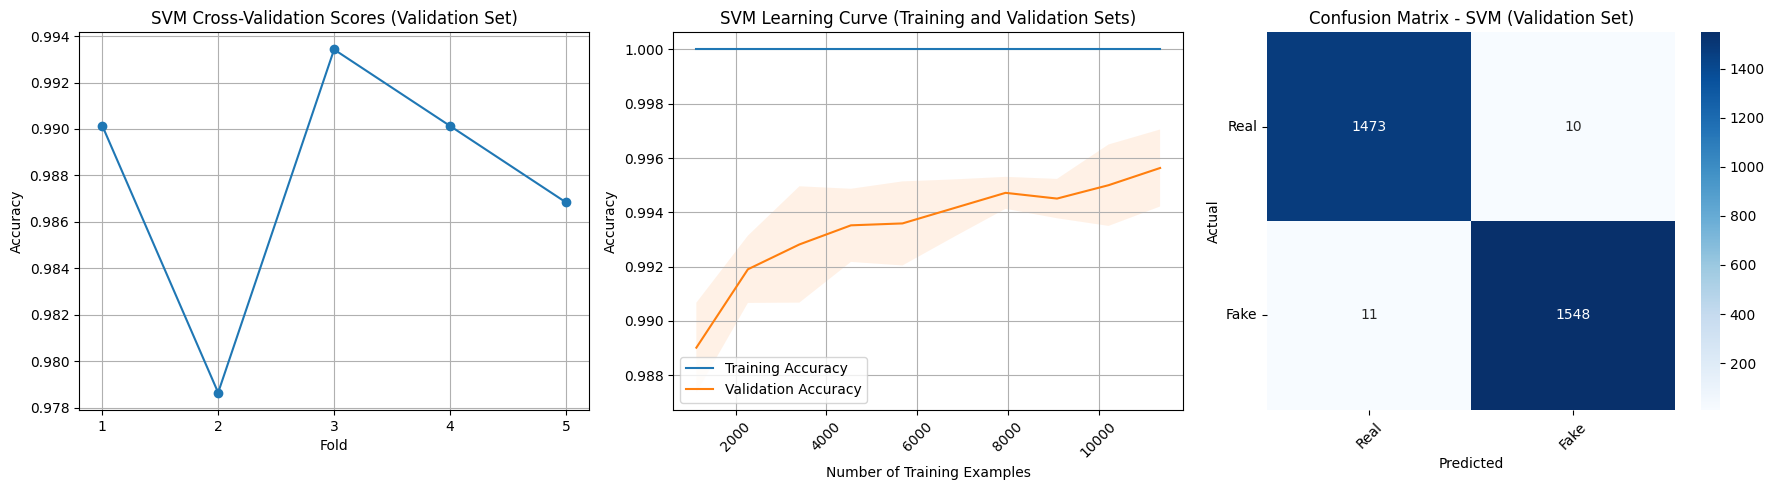

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the extracted features and labels from Drive
# loaded_features = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Features.npy')
# loaded_labels = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Labels.npy')

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(loaded_features, loaded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Regularization strength (C value) for L2 regularization
C = 0.1

# Train an SVM classifier with L2 regularization
svm_classifier = SVC(kernel='linear', C=C)

# Calculate learning curve for SVM on training set
train_sizes, train_scores, val_scores = learning_curve(
    svm_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Print SVM cross-validation scores on validation set
svm_cv_scores = cross_val_score(svm_classifier, X_val, y_val, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores (Validation Set):", svm_cv_scores)

# Calculate mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print mean and standard deviation of train and validation scores
for i, train_size in enumerate(train_sizes):
    print(f"Train Size: {train_size}")
    print(f"Train Score Mean: {train_scores_mean[i]:.3f} (+/- {train_scores_std[i]:.3f})")
    print(f"Validation Score Mean: {val_scores_mean[i]:.3f} (+/- {val_scores_std[i]:.3f})")
    print("="*30)

# Create a figure with three subplots
plt.figure(figsize=(18, 5))

# Plot SVM cross-validation scores in the first subplot
plt.subplot(1, 3, 1)
plt.plot(range(1, 6), svm_cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM Cross-Validation Scores (Validation Set)')
plt.xticks(np.arange(1, 6))
plt.grid()

# Plot learning curve in the second subplot
plt.subplot(1, 3, 2)
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('SVM Learning Curve (Training and Validation Sets)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels to be horizontal
plt.grid()

# Train SVM on the entire training set
svm_classifier.fit(X_train, y_train)

# Predict labels using the trained SVM classifier on the validation set
svm_val_predictions = svm_classifier.predict(X_val)

# Calculate and print SVM accuracy on validation set
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print("SVM Accuracy (Validation Set):", svm_val_accuracy)

# Calculate confusion matrix for validation set predictions
conf_matrix_val = confusion_matrix(y_val, svm_val_predictions)

# Plot confusion matrix using heatmap in the third subplot
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Validation Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


SVM Hyperparameter tuning

SVM Cross-Validation Scores (Validation Set): [0.99014778 0.97865353 0.99177632 0.99342105 0.98684211]
Train Size: 1135
Train Score Mean: 0.992 (+/- 0.001)
Validation Score Mean: 0.985 (+/- 0.002)
Train Size: 2271
Train Score Mean: 0.994 (+/- 0.001)
Validation Score Mean: 0.990 (+/- 0.002)
Train Size: 3406
Train Score Mean: 0.995 (+/- 0.001)
Validation Score Mean: 0.992 (+/- 0.002)
Train Size: 4542
Train Score Mean: 0.995 (+/- 0.000)
Validation Score Mean: 0.993 (+/- 0.002)
Train Size: 5678
Train Score Mean: 0.996 (+/- 0.000)
Validation Score Mean: 0.994 (+/- 0.002)
Train Size: 6813
Train Score Mean: 0.996 (+/- 0.000)
Validation Score Mean: 0.994 (+/- 0.001)
Train Size: 7949
Train Score Mean: 0.996 (+/- 0.000)
Validation Score Mean: 0.994 (+/- 0.001)
Train Size: 9084
Train Score Mean: 0.996 (+/- 0.000)
Validation Score Mean: 0.995 (+/- 0.001)
Train Size: 10220
Train Score Mean: 0.996 (+/- 0.000)
Validation Score Mean: 0.995 (+/- 0.001)
Train Size: 11356
Train Score Mean: 0.996 (+/- 0.0

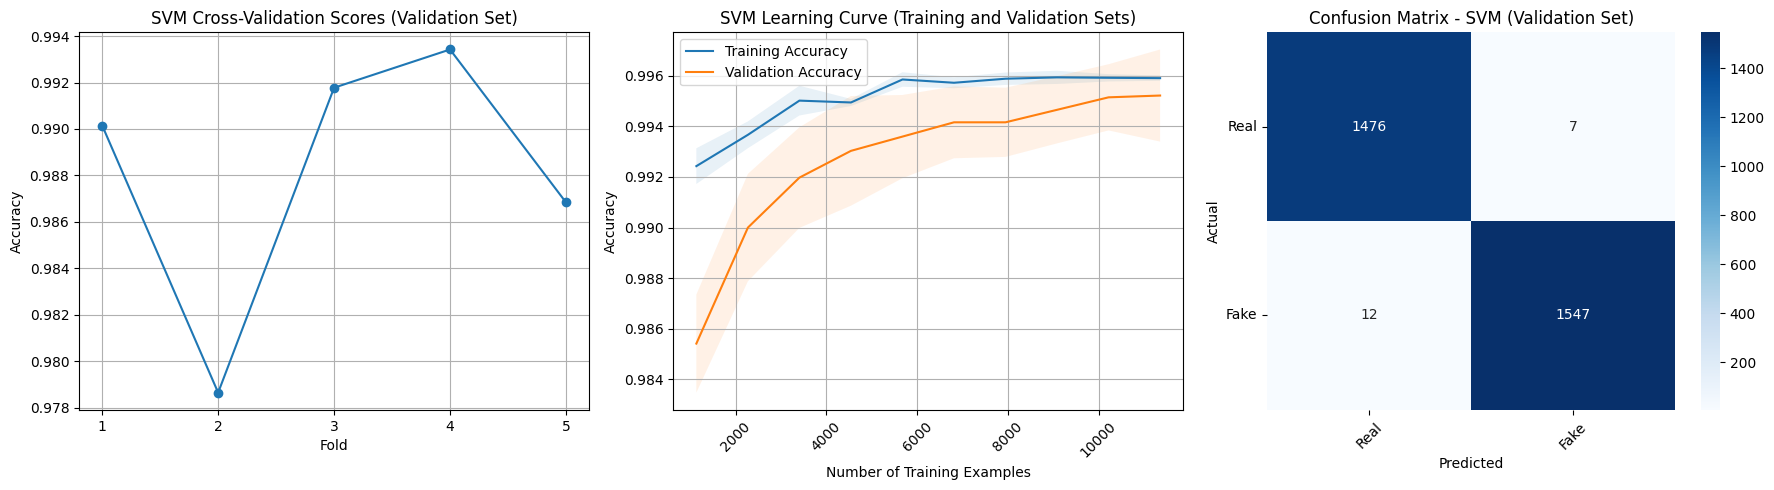

In [13]:
# Regularization strength (C value) for L2 regularization
C = 0.0001

# Train an SVM classifier with L2 regularization
svm_classifier = SVC(kernel='linear', C=C)

# Calculate learning curve for SVM on training set
train_sizes, train_scores, val_scores = learning_curve(
    svm_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Print SVM cross-validation scores on validation set
svm_cv_scores = cross_val_score(svm_classifier, X_val, y_val, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores (Validation Set):", svm_cv_scores)

# Calculate mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print mean and standard deviation of train and validation scores
for i, train_size in enumerate(train_sizes):
    print(f"Train Size: {train_size}")
    print(f"Train Score Mean: {train_scores_mean[i]:.3f} (+/- {train_scores_std[i]:.3f})")
    print(f"Validation Score Mean: {val_scores_mean[i]:.3f} (+/- {val_scores_std[i]:.3f})")
    print("="*30)

# Create a figure with three subplots
plt.figure(figsize=(18, 5))

# Plot SVM cross-validation scores in the first subplot
plt.subplot(1, 3, 1)
plt.plot(range(1, 6), svm_cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM Cross-Validation Scores (Validation Set)')
plt.xticks(np.arange(1, 6))
plt.grid()

# Plot learning curve in the second subplot
plt.subplot(1, 3, 2)
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('SVM Learning Curve (Training and Validation Sets)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels to be horizontal
plt.grid()

# Train SVM on the entire training set
svm_classifier.fit(X_train, y_train)

# Predict labels using the trained SVM classifier on the validation set
svm_val_predictions = svm_classifier.predict(X_val)

# Calculate and print SVM accuracy on validation set
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print("SVM Accuracy (Validation Set):", svm_val_accuracy)

# Calculate confusion matrix for validation set predictions
conf_matrix_val = confusion_matrix(y_val, svm_val_predictions)

# Plot confusion matrix using heatmap in the third subplot
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Validation Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


SVM Cross-Validation Scores (Validation Set): [0.97701149 0.96715928 0.97039474 0.98355263 0.97697368]
Train Size: 1135
Train Score Mean: 0.978 (+/- 0.000)
Validation Score Mean: 0.973 (+/- 0.002)
Train Size: 2271
Train Score Mean: 0.984 (+/- 0.002)
Validation Score Mean: 0.980 (+/- 0.001)
Train Size: 3406
Train Score Mean: 0.985 (+/- 0.001)
Validation Score Mean: 0.983 (+/- 0.001)
Train Size: 4542
Train Score Mean: 0.985 (+/- 0.001)
Validation Score Mean: 0.985 (+/- 0.001)
Train Size: 5678
Train Score Mean: 0.987 (+/- 0.000)
Validation Score Mean: 0.986 (+/- 0.002)
Train Size: 6813
Train Score Mean: 0.987 (+/- 0.000)
Validation Score Mean: 0.987 (+/- 0.001)
Train Size: 7949
Train Score Mean: 0.989 (+/- 0.000)
Validation Score Mean: 0.988 (+/- 0.001)
Train Size: 9084
Train Score Mean: 0.989 (+/- 0.000)
Validation Score Mean: 0.988 (+/- 0.001)
Train Size: 10220
Train Score Mean: 0.989 (+/- 0.000)
Validation Score Mean: 0.988 (+/- 0.001)
Train Size: 11356
Train Score Mean: 0.990 (+/- 0.0

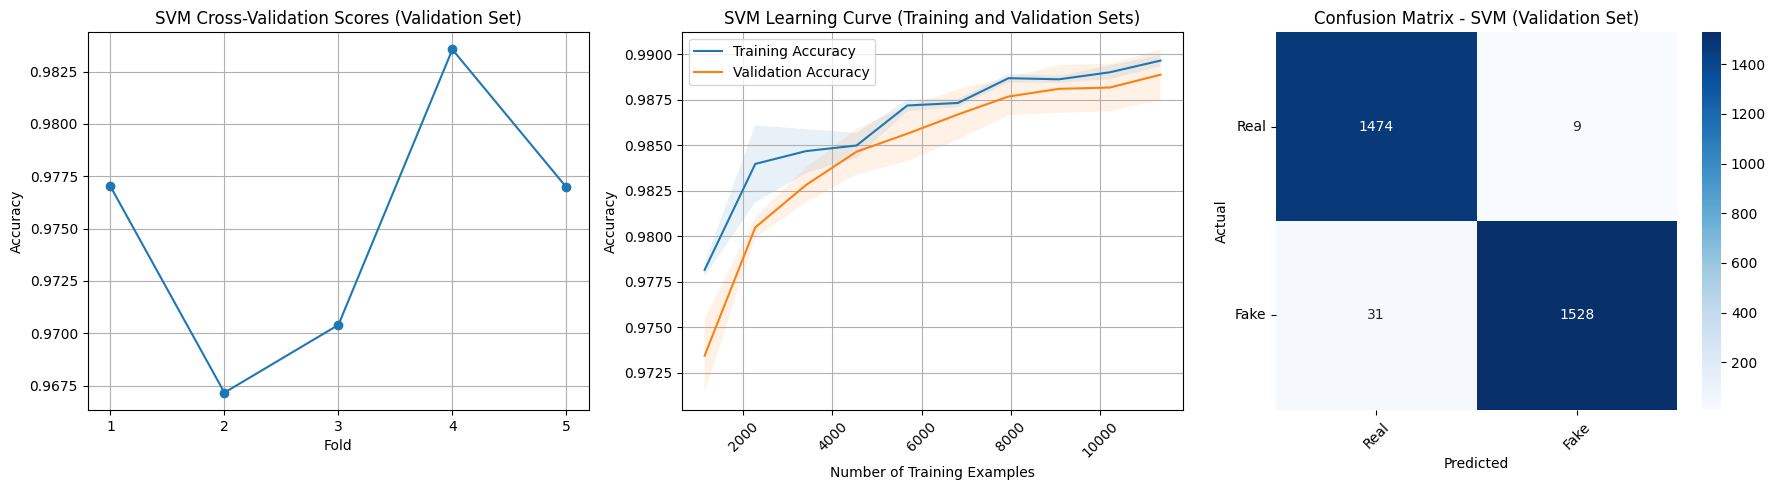

In [14]:
# Regularization strength (C value) for L2 regularization
C = 0.00001

# Train an SVM classifier with L2 regularization
svm_classifier = SVC(kernel='linear', C=C)

# Calculate learning curve for SVM on training set
train_sizes, train_scores, val_scores = learning_curve(
    svm_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Print SVM cross-validation scores on validation set
svm_cv_scores = cross_val_score(svm_classifier, X_val, y_val, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores (Validation Set):", svm_cv_scores)

# Calculate mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Print mean and standard deviation of train and validation scores
for i, train_size in enumerate(train_sizes):
    print(f"Train Size: {train_size}")
    print(f"Train Score Mean: {train_scores_mean[i]:.3f} (+/- {train_scores_std[i]:.3f})")
    print(f"Validation Score Mean: {val_scores_mean[i]:.3f} (+/- {val_scores_std[i]:.3f})")
    print("="*30)

# Create a figure with three subplots
plt.figure(figsize=(18, 5))

# Plot SVM cross-validation scores in the first subplot
plt.subplot(1, 3, 1)
plt.plot(range(1, 6), svm_cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM Cross-Validation Scores (Validation Set)')
plt.xticks(np.arange(1, 6))
plt.grid()

# Plot learning curve in the second subplot
plt.subplot(1, 3, 2)
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('SVM Learning Curve (Training and Validation Sets)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels to be horizontal
plt.grid()

# Train SVM on the entire training set
svm_classifier.fit(X_train, y_train)

# Predict labels using the trained SVM classifier on the validation set
svm_val_predictions = svm_classifier.predict(X_val)

# Calculate and print SVM accuracy on validation set
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print("SVM Accuracy (Validation Set):", svm_val_accuracy)

# Calculate confusion matrix for validation set predictions
conf_matrix_val = confusion_matrix(y_val, svm_val_predictions)

# Plot confusion matrix using heatmap in the third subplot
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Validation Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


Evaluation on the best predicted parameters using SVM (C=0.0001)

Optimized SVM Log Loss (Test Set): 0.22512472531006794
Optimized SVM Matthews Correlation Coefficient (MCC) (Test Set): 0.9875134245487154
Optimized SVM Accuracy: 0.9958577839143942
Optimized SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10010
           1       1.00      0.99      1.00     10269

    accuracy                           1.00     20279
   macro avg       1.00      1.00      1.00     20279
weighted avg       1.00      1.00      1.00     20279



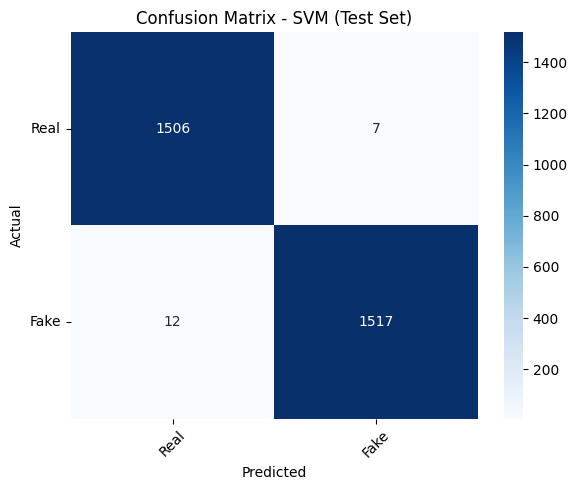

In [15]:
# Regularization strength (C value) for L2 regularization
C = 0.0001

# Train an SVM classifier with L2 regularization and optimized hyperparameters
svm_classifier = SVC(kernel='linear', C=C)

# Fit the SVM classifier on the entire dataset
svm_classifier.fit(loaded_features, loaded_labels)

# Predict labels using the trained SVM classifier
svm_predictions = svm_classifier.predict(loaded_features)

# Calculate and print SVM accuracy and classification report
svm_accuracy = accuracy_score(loaded_labels, svm_predictions)
svm_report = classification_report(loaded_labels, svm_predictions)

# Predict probabilities using the trained SVM classifier on the test set
svm_test_probs = svm_classifier.decision_function(X_test)

# Convert probabilities to binary predictions
svm_test_predictions = (svm_test_probs > 0).astype(int)

# Calculate log loss for test set
from sklearn.metrics import log_loss
svm_test_log_loss = log_loss(y_test, svm_test_predictions)

# Calculate Matthews Correlation Coefficient (MCC) for test set
from sklearn.metrics import matthews_corrcoef
svm_test_mcc = matthews_corrcoef(y_test, svm_test_predictions)

print("Optimized SVM Log Loss (Test Set):", svm_test_log_loss)
print("Optimized SVM Matthews Correlation Coefficient (MCC) (Test Set):", svm_test_mcc)

print("Optimized SVM Accuracy:", svm_accuracy)
print("Optimized SVM Classification Report:\n", svm_report)

# Calculate confusion matrix for test set predictions
conf_matrix_test = confusion_matrix(y_test, svm_test_predictions)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Test Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

SVM accuracy on the best performing parameter is 0.9958

Implementation and hyperparameter tuning of Random Forest

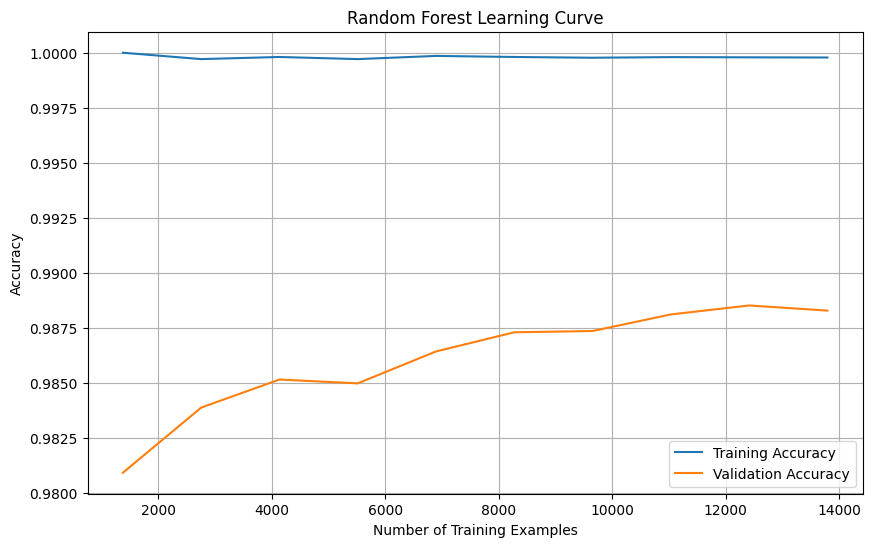

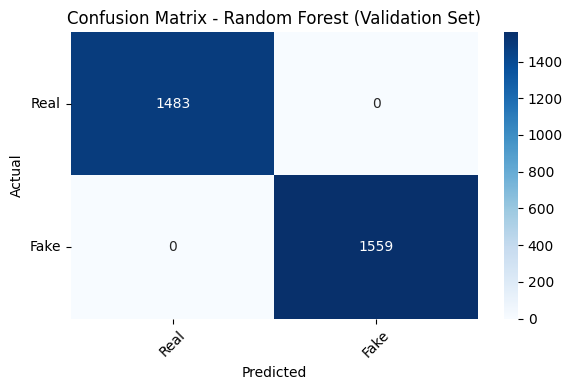

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the extracted features and labels from Drive
# loaded_features = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Features.npy')
# loaded_labels = np.load('/content/drive/MyDrive/Deep Fake Data/Project data/Preprocessed/Labels.npy')

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(loaded_features, loaded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Combine the training and validation sets for learning curve
X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

# Define the parameter settings for the Random Forest classifier
rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

# Initialize the Random Forest classifier with specified parameter settings
rf_classifier = RandomForestClassifier(**rf_params)

# Plot learning curve for the Random Forest classifier
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_combined, y_combined, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Train the Random Forest classifier on the combined training and validation sets
rf_classifier.fit(X_combined, y_combined)

# Predict labels using the trained RandomForestClassifier on the validation set
rf_val_predictions = rf_classifier.predict(X_val)

# Calculate confusion matrix for validation set predictions
conf_matrix_rf_val = confusion_matrix(y_val, rf_val_predictions)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Validation Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plots
plt.show()


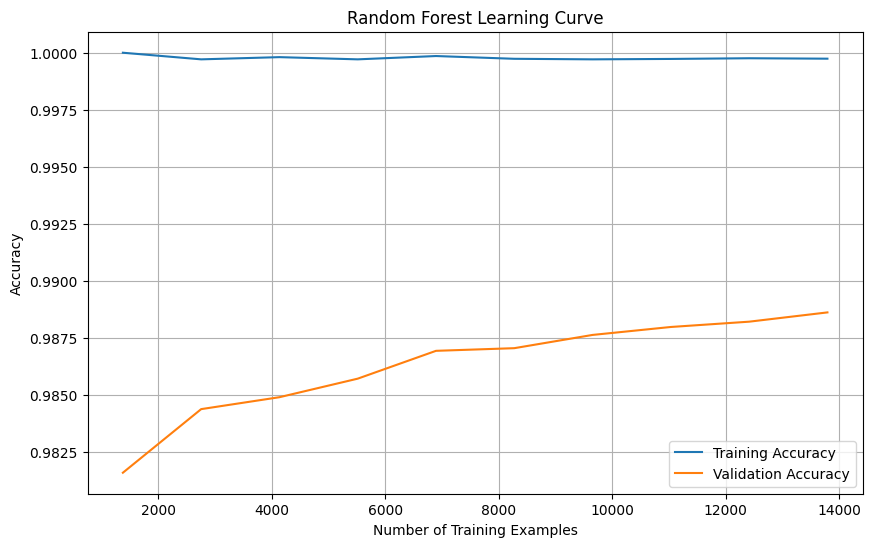

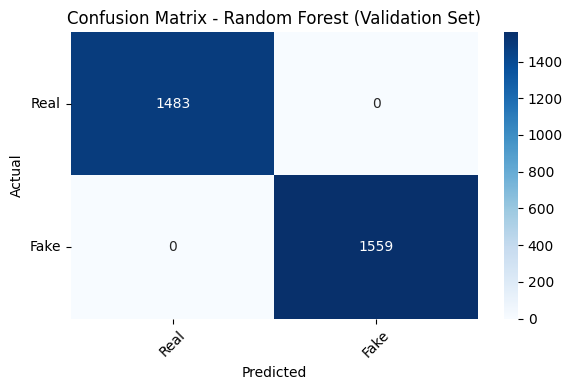

In [19]:
# Define the parameter settings for the Random Forest classifier
rf_params = {
    'n_estimators': 500,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

# Initialize the Random Forest classifier with specified parameter settings
rf_classifier = RandomForestClassifier(**rf_params)

# Plot learning curve for the Random Forest classifier
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_combined, y_combined, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Train the Random Forest classifier on the combined training and validation sets
rf_classifier.fit(X_combined, y_combined)

# Predict labels using the trained RandomForestClassifier on the validation set
rf_val_predictions = rf_classifier.predict(X_val)

# Calculate confusion matrix for validation set predictions
conf_matrix_rf_val = confusion_matrix(y_val, rf_val_predictions)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Validation Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plots
plt.show()


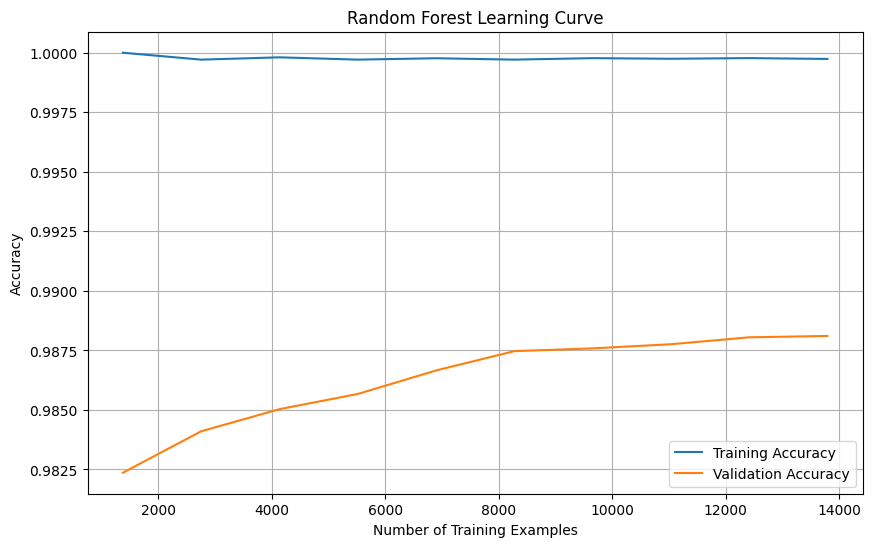

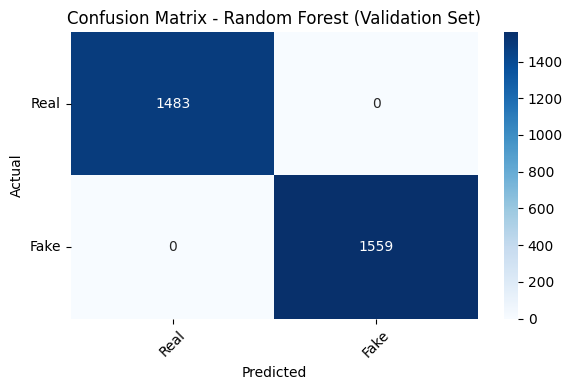

In [20]:
# Define the parameter settings for the Random Forest classifier
rf_params = {
    'n_estimators': 1000,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

# Initialize the Random Forest classifier with specified parameter settings
rf_classifier = RandomForestClassifier(**rf_params)

# Plot learning curve for the Random Forest classifier
train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X_combined, y_combined, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Train the Random Forest classifier on the combined training and validation sets
rf_classifier.fit(X_combined, y_combined)

# Predict labels using the trained RandomForestClassifier on the validation set
rf_val_predictions = rf_classifier.predict(X_val)

# Calculate confusion matrix for validation set predictions
conf_matrix_rf_val = confusion_matrix(y_val, rf_val_predictions)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Validation Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plots
plt.show()


Evaluating the RF model on best performing hyperparameters.
    'n_estimators': 1000,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42

Random Forest Test Accuracy: 0.9868507560815253
Random Forest Test Precision: 0.9837556855100714
Random Forest Test Recall: 0.9901896664486592
Random Forest Test F1-score: 0.9869621903520209
Random Forest Test Log Loss: 0.08502311779361157
Random Forest Test Matthews Correlation Coefficient (MCC): 0.9737209228227162


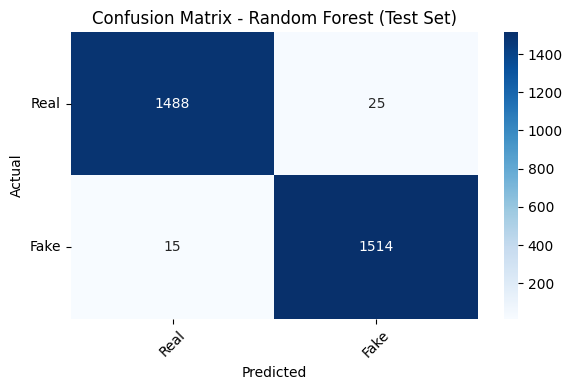

In [21]:
# Predict labels using the trained RandomForestClassifier on the test set
rf_test_predictions = rf_classifier.predict(X_test)
rf_test_probs = rf_classifier.predict_proba(X_test)

# Calculate evaluation metrics for test set
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)
rf_test_log_loss = log_loss(y_test, rf_test_probs)
rf_test_mcc = matthews_corrcoef(y_test, rf_test_predictions)

# Display evaluation metrics for test set
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1-score:", rf_test_f1)
print("Random Forest Test Log Loss:", rf_test_log_loss)
print("Random Forest Test Matthews Correlation Coefficient (MCC):", rf_test_mcc)

# Calculate confusion matrix for test set predictions
conf_matrix_rf_test = confusion_matrix(y_test, rf_test_predictions)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plots
plt.show()


1. train and test accuracy of each model on 5 fold cross validation
2. saving it as .csv file

In [31]:

# Initialize a StratifiedKFold object for cross-validation with 5 folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train), 1):
    train_data, train_labels = X_train[train_idx], y_train[train_idx]
    val_data, val_labels = X_train[val_idx], y_train[val_idx]
    test_data, test_labels = X_test, y_test  # Use the entire test set for evaluation in each fold

    # Train a Convolutional Neural Network (CNN)
    cnn_model = Sequential([
        Flatten(input_shape=(loaded_features.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ])

    cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    cnn_history = cnn_model.fit(train_data, train_labels, batch_size=64, epochs=20, validation_data=(val_data, val_labels), verbose=0)

    # Evaluate the model on the training and test sets
    train_accuracy = cnn_model.evaluate(train_data, train_labels, verbose=0)[1]
    test_accuracy = cnn_model.evaluate(test_data, test_labels, verbose=0)[1]

    # Print CNN accuracy for the current fold
    print(f"Fold {fold_idx} - CNN Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Train an SVM classifier
    C=0.0001
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(train_data, train_labels)

    # Evaluate SVM on training and test sets
    svm_train_accuracy = accuracy_score(train_labels, svm_classifier.predict(train_data))
    svm_test_accuracy = accuracy_score(test_labels, svm_classifier.predict(test_data))

    # Print SVM accuracy for the current fold
    print(f"Fold {fold_idx} - SVM Train Accuracy: {svm_train_accuracy:.4f}, Test Accuracy: {svm_test_accuracy:.4f}")

    # Train a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=1000,max_depth = None, min_samples_split= 5, min_samples_leaf = 2,random_state=42)
    rf_classifier.fit(train_data, train_labels)

    # Evaluate Random Forest on training and test sets
    rf_train_accuracy = accuracy_score(train_labels, rf_classifier.predict(train_data))
    rf_test_accuracy = accuracy_score(test_labels, rf_classifier.predict(test_data))

    # Print Random Forest accuracy for the current fold
    print(f"Fold {fold_idx} - Random Forest Train Accuracy: {rf_train_accuracy:.4f}, Test Accuracy: {rf_test_accuracy:.4f}")


Fold 1 - CNN Train Accuracy: 0.9998, Test Accuracy: 0.9954
Fold 1 - SVM Train Accuracy: 0.9959, Test Accuracy: 0.9921
Fold 1 - Random Forest Train Accuracy: 0.9996, Test Accuracy: 0.9869
Fold 2 - CNN Train Accuracy: 0.9999, Test Accuracy: 0.9951
Fold 2 - SVM Train Accuracy: 0.9962, Test Accuracy: 0.9915
Fold 2 - Random Forest Train Accuracy: 0.9999, Test Accuracy: 0.9875
Fold 3 - CNN Train Accuracy: 0.9989, Test Accuracy: 0.9938
Fold 3 - SVM Train Accuracy: 0.9958, Test Accuracy: 0.9924
Fold 3 - Random Forest Train Accuracy: 0.9997, Test Accuracy: 0.9875
Fold 4 - CNN Train Accuracy: 0.9996, Test Accuracy: 0.9951
Fold 4 - SVM Train Accuracy: 0.9955, Test Accuracy: 0.9924
Fold 4 - Random Forest Train Accuracy: 0.9998, Test Accuracy: 0.9872
Fold 5 - CNN Train Accuracy: 0.9994, Test Accuracy: 0.9941
Fold 5 - SVM Train Accuracy: 0.9959, Test Accuracy: 0.9928
Fold 5 - Random Forest Train Accuracy: 0.9997, Test Accuracy: 0.9882


Saving the evaluation metrix as .csv file

In [32]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef

# Define the parameter settings for SVM
svm_params = {
    'C': 0.0001,
    'kernel': 'linear',
    'random_state': 42
}

# Initialize SVM classifier
svm_classifier = SVC(**svm_params)

# Train SVM on training set
svm_classifier.fit(X_train, y_train)

# Predict labels using SVM on the test set
svm_test_predictions = svm_classifier.predict(X_test)
svm_test_probs = svm_classifier.decision_function(X_test)

# Calculate evaluation metrics for SVM on test set
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
svm_test_precision = precision_score(y_test, svm_test_predictions)
svm_test_recall = recall_score(y_test, svm_test_predictions)
svm_test_f1 = f1_score(y_test, svm_test_predictions)
svm_test_log_loss = log_loss(y_test, svm_test_probs)
svm_test_mcc = matthews_corrcoef(y_test, svm_test_predictions)

# Define the parameter settings for Random Forest
rf_params = {
    'n_estimators': 1000,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(**rf_params)

# Train Random Forest on training set
rf_classifier.fit(X_train, y_train)

# Predict labels using Random Forest on the test set
rf_test_predictions = rf_classifier.predict(X_test)
rf_test_probs = rf_classifier.predict_proba(X_test)

# Calculate evaluation metrics for Random Forest on test set
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)
rf_test_log_loss = log_loss(y_test, rf_test_probs)
rf_test_mcc = matthews_corrcoef(y_test, rf_test_predictions)

# Define your CNN model and train it on the training set
# ... (your CNN model training code here)

# Predict labels using CNN on the test set
cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_predictions_binary = (cnn_test_predictions > 0.5).astype(int)

# Calculate evaluation metrics for CNN on test set
cnn_test_accuracy = accuracy_score(y_test, cnn_test_predictions_binary)
cnn_test_precision = precision_score(y_test, cnn_test_predictions_binary)
cnn_test_recall = recall_score(y_test, cnn_test_predictions_binary)
cnn_test_f1 = f1_score(y_test, cnn_test_predictions_binary)
cnn_test_log_loss = log_loss(y_test, cnn_test_predictions)
cnn_test_mcc = matthews_corrcoef(y_test, cnn_test_predictions_binary)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print("=" * 50)
print(f"SVM - Accuracy: {svm_test_accuracy:.4f}, Precision: {svm_test_precision:.4f}, Recall: {svm_test_recall:.4f}, F1-score: {svm_test_f1:.4f}, Log Loss: {svm_test_log_loss:.4f}, MCC: {svm_test_mcc:.4f}")
print(f"Random Forest - Accuracy: {rf_test_accuracy:.4f}, Precision: {rf_test_precision:.4f}, Recall: {rf_test_recall:.4f}, F1-score: {rf_test_f1:.4f}, Log Loss: {rf_test_log_loss:.4f}, MCC: {rf_test_mcc:.4f}")
print(f"CNN - Accuracy: {cnn_test_accuracy:.4f}, Precision: {cnn_test_precision:.4f}, Recall: {cnn_test_recall:.4f}, F1-score: {cnn_test_f1:.4f}, Log Loss: {cnn_test_log_loss:.4f}, MCC: {cnn_test_mcc:.4f}")


96/96 [==============================] - 0s 2ms/step
Model Evaluation Metrics:
SVM - Accuracy: 0.9924, Precision: 0.9941, Recall: 0.9908, F1-score: 0.9925, Log Loss: 0.1917, MCC: 0.9849
Random Forest - Accuracy: 0.9882, Precision: 0.9857, Recall: 0.9908, F1-score: 0.9883, Log Loss: 0.0878, MCC: 0.9763
CNN - Accuracy: 0.9941, Precision: 0.9980, Recall: 0.9902, F1-score: 0.9941, Log Loss: 0.0207, MCC: 0.9882


CNN with test accuracy of 0.9957 outperforming among three models

Saving the best model for Streamlit dashboard

In [33]:
import joblib

# Save the trained CNN model using joblib
cnn_model_filename = 'cnn_model.joblib'
joblib.dump(cnn_model, cnn_model_filename)

print("CNN model saved to", cnn_model_filename)

CNN model saved to cnn_model.joblib
